# Introduction

The data is provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. 

# Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime as dt
import seaborn as sns

c:\users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


Reading Data :

In [3]:
train = pd.read_csv('train.csv',low_memory = False)

In [4]:
train.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Converting Date Column to DateTime Data type :

In [5]:
train['Date'] = pd.to_datetime(train['Date']) 

Extracting Date Features :

In [6]:
train['Year'] = train['Date'].dt.year 
train['Month'] = train['Date'].dt.month 
train['Day'] = train['Date'].dt.day

In [7]:
train = train.drop('Date',axis=1)

# Exploratory Data Analysis

In [8]:
train.shape

(1017209, 11)

In [9]:
train.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day'],
      dtype='object')

In [10]:
train.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
 8   Year           1017209 non-null  int64 
 9   Month          1017209 non-null  int64 
 10  Day            1017209 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 85.4+ MB


In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
Year,1017209.0,2013.832292,0.777396,2013.0,2013.0,2014.0,2014.0,2015.0
Month,1017209.0,5.846762,3.326097,1.0,3.0,6.0,8.0,12.0
Day,1017209.0,15.702790,8.787638,1.0,8.0,16.0,23.0,31.0


In [12]:
train.isnull().sum()  

Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Year             0
Month            0
Day              0
dtype: int64

# Plots

Text(0.5, 1.0, 'Sales by Year')

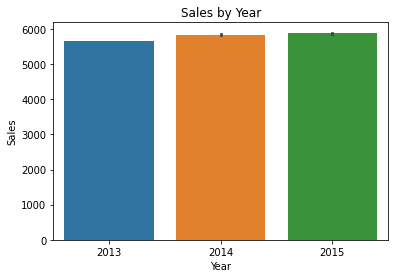

In [13]:
sns.barplot(x = train['Year'], y = train['Sales']) 
plt.title('Sales by Year')

Maximum Sales was in Year 2014 and 2015

Text(0.5, 1.0, 'Sales by Month')

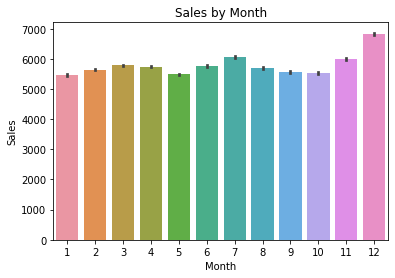

In [14]:
sns.barplot(x = train['Month'], y = train['Sales'])
plt.title('Sales by Month')

highest sales was in 12th month i.e, December

Creating Function to check various aspects of the dataset :

In [18]:
def sniff_modified(df):
    data = pd.DataFrame()
    data['Data Type'] = df.dtypes                                                        
    data['Percent_Missing'] = (df.isnull().sum()*100)/len(df)
    data['Unique_values'] = df.apply(lambda x: x.unique())
    data['Count_Unique_values'] = df.apply(lambda x: len(x.unique()))
    return data.sort_values('Data Type')

In [19]:
sniff_modified(train)

,Data Type,Percent_Missing,Unique_values,Count_Unique_values
Store,int64,0.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1115
DayOfWeek,int64,0.0,"[5, 4, 3, 2, 1, 7, 6]",7
Sales,int64,0.0,"[5263, 6064, 8314, 13995, 4822, 5651, 15344, 8...",21734
Customers,int64,0.0,"[555, 625, 821, 1498, 559, 589, 1414, 833, 687...",4086
Open,int64,0.0,"[1, 0]",2
Promo,int64,0.0,"[1, 0]",2
SchoolHoliday,int64,0.0,"[1, 0]",2
Year,int64,0.0,"[2015, 2014, 2013]",3
Month,int64,0.0,"[7, 6, 5, 4, 3, 2, 1, 12, 11, 10, 9, 8]",12
Day,int64,0.0,"[31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 2...",31


In [22]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(mapping=[{'col':'StateHoliday','mapping':{'0':0,'a':1,'b':2,'c':3}}])
encoder.fit(train)
train = encoder.transform(train)

# Training The Model

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,accuracy_score,mean_absolute_error
from sklearn.model_selection import train_test_split
x = train.drop('Sales',axis = 1)
y = train['Sales']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)
rf = RandomForestRegressor(n_jobs = -1,n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [24]:
prediction = rf.predict(X_test)
r2 = r2_score(y_test,prediction)
e = mean_absolute_error(y_test,prediction)
ep = e*100 / y_test.mean()

In [25]:
print(f"R^2 Score :{r2:.2f}")

R^2 Score :0.96


In [26]:
print(f"${e:.0f} error; {ep:.2f}% error")

$470 error; 8.14% error


In [27]:
output = pd.DataFrame({'Actual_Values':y_test,'Predictions':prediction})

In [28]:
output.head(20)

,Actual_Values,Predictions
876867,9225,9027.68
934965,3745,3641.16
275889,4983,5345.60
627106,16353,17958.03
918021,9562,11022.88
968817,7118,6963.04
928003,5653,5806.58
103893,10171,7934.71
76761,0,0.00
316936,8725,8133.48
